In [15]:
import pandas as pd


In [16]:
scored_variants = pd.read_csv("/mnt/lab_data2/anusri/signed_variant_scorer/variant-scorer/output/blood_traits/ATAC/summary.mean.variant_scores.tsv", sep="\t", header=0)


In [17]:
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.rcParams['figure.figsize'] = [12, 10]

def plot_enrichment_curves(df, compare_score, model_score, output_file, compare_score_ascending=False, model_score_ascending=True,
                           thresh_list=[0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001], subsample=False, ymax='auto', debug=False):
    by_thresh_dict = {'score':[], 'ratio':[], 'thresh':[]}
    
    for thresh in thresh_list:
        df[compare_score].fillna(0, inplace=True)
        sample_df = df.sort_values(by=[compare_score, model_score], ascending=[False, True])
        #print(sample_df.head())
        #print(sample_df.tail())
        print(sum(sample_df[model_score] < thresh))
        ratio = len(sample_df.loc[sample_df[model_score] < thresh]) / len(sample_df)
        sample_df['sig'] = sample_df[model_score].apply(lambda x: x < thresh)
        sample_df['expected'] = [ratio] * len(sample_df)
        expected = sample_df['expected'].cumsum().tolist()
        observed = sample_df['sig'].cumsum().tolist()
        
        enrich_ratio = np.array(observed) / np.array(expected)
        compare_vals = sample_df[compare_score].tolist()
        enrich_ratio = enrich_ratio.tolist()
        assert len(compare_vals) == len(enrich_ratio)
        by_thresh_dict['ratio'].extend(enrich_ratio)
        by_thresh_dict['score'].extend(compare_vals)
        by_thresh_dict['thresh'].extend([thresh] * len(sample_df))
        
        if debug:
            print(thresh)
            print('Expected:', expected[:10])
            print('Observed:', observed[:10])
            print('Ratio:', enrich_ratio[:10])
            print('Compare Scores:', compare_vals[:10])
            print()
        
    by_thresh_df = pd.DataFrame(by_thresh_dict)
    by_thresh_df.sort_values(by=['score'], ascending=False, inplace=True)
    return by_thresh_df

In [18]:
scored_variants

,chr,pos,allele1,allele2,variant_id,logfc.mean,logfc.mean.pval,abs_logfc.mean,abs_logfc.mean.pval,jsd.mean,...,abs_logfc_x_jsd.mean,abs_logfc_x_jsd.mean.pval,logfc_x_max_percentile.mean,logfc_x_max_percentile.mean.pval,abs_logfc_x_max_percentile.mean,abs_logfc_x_max_percentile.mean.pval,jsd_x_max_percentile.mean,jsd_x_max_percentile.mean.pval,abs_logfc_x_jsd_x_max_percentile.mean,abs_logfc_x_jsd_x_max_percentile.mean.pval
0,chr1,10352,T,TA,rs150218945,-0.036835,0.431350,0.036835,0.416884,0.016749,...,0.000627,0.199504,-0.029447,0.083639,0.029447,0.079137,0.013559,0.013340,0.000497,0.055084
1,chr1,11012,C,G,rs544419019,-0.010156,0.758090,0.013361,0.747429,0.022090,...,0.000274,0.417252,-0.008023,0.249904,0.010308,0.242828,0.017922,0.008412,0.000218,0.116639
2,chr1,13110,G,A,rs540538026,-0.005588,0.892499,0.005588,0.879028,0.003792,...,0.000021,0.921367,-0.001418,0.628880,0.001418,0.615773,0.000946,0.468804,0.000005,0.703089
3,chr1,13116,T,G,rs62635286,0.006778,0.850848,0.006778,0.864360,0.005039,...,0.000033,0.888673,0.002300,0.579404,0.002300,0.591927,0.001264,0.397258,0.000011,0.649554
4,chr1,13118,A,G,rs200579949,0.028640,0.494169,0.028640,0.509369,0.006264,...,0.000177,0.540872,0.008317,0.279875,0.008317,0.289889,0.001618,0.333919,0.000050,0.334598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11916119,chr21,46697787,C,G,rs11910421,-0.004719,0.664456,0.018041,0.664495,0.007654,...,0.000121,0.655946,-0.000997,0.320386,0.006444,0.321422,0.003402,0.157876,0.000046,0.332312
11916120,chr21,46698531,T,G,rs533222456,-0.000439,0.848866,0.007505,0.849250,0.013225,...,0.000102,0.690715,-0.000774,0.364537,0.005196,0.363918,0.009068,0.029883,0.000071,0.263929
11916121,chr21,46699340,G,A,rs199868906,-0.076087,0.183030,0.076087,0.175490,0.070319,...,0.005143,0.020212,-0.042035,0.066382,0.042035,0.063128,0.040165,0.002090,0.002887,0.012964
11916122,chr21,46699340,G,T,rs199868906,-0.047143,0.232066,0.063849,0.225487,0.060703,...,0.003669,0.030690,-0.034074,0.080489,0.036686,0.077505,0.035690,0.002837,0.002163,0.018103


In [19]:
blood_variants=pd.read_csv("/mnt/lab_data2/anusri/signed_variant_scorer/variant-scorer/output/blood_traits/SNP_info_table.tsv", sep="\t", header=0)
#blood_variants=pd.read_csv("/oak/stanford/groups/akundaje/projects/igvf-fcc/data/rosa/SNP_info_table.blood.superset.tsv", sep="\t", header=0)

In [20]:
def flatten(l):
    return [item for sublist in l for item in sublist]

import numpy as np


set(flatten(blood_variants['traits'].str.split("|").values.tolist()))

{'MCH', 'MCHC', 'MCV'}

In [21]:
final = scored_variants.merge(blood_variants, how="left", left_on=["variant_id", "allele1", "allele2"], right_on=["rsid", "allele1", "allele2"])



In [8]:

final.count()

chr                                           11916124
pos                                           11916124
allele1                                       11916124
allele2                                       11916124
variant_id                                    11916124
logfc.mean                                    11916124
logfc.mean.pval                               11916124
abs_logfc.mean                                11916124
abs_logfc.mean.pval                           11916124
jsd.mean                                      11916124
jsd.mean.pval                                 11916124
logfc_x_jsd.mean                              11916124
logfc_x_jsd.mean.pval                         11916124
abs_logfc_x_jsd.mean                          11916124
abs_logfc_x_jsd.mean.pval                     11916124
logfc_x_max_percentile.mean                   11916124
logfc_x_max_percentile.mean.pval              11916124
abs_logfc_x_max_percentile.mean               11916124
abs_logfc_

In [9]:
import numpy as np
import seaborn as sns

by_thresh_df = plot_enrichment_curves(final,
                       compare_score='maxPIP', model_score='abs_logfc_x_jsd_x_max_percentile.mean.pval',
                       compare_score_ascending=False, model_score_ascending=True, output_file="bloodtraits_abs_logfc_x_jsd_x_max_percentile.pdf")

4986998
728384
336306
66207
33135
6280
3087
635


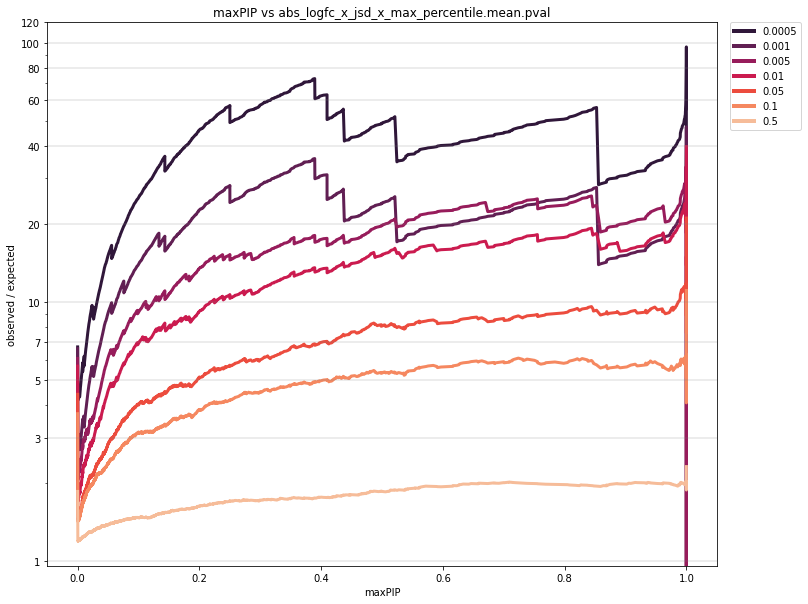

In [14]:
0.0001
n_by_thresh_df = by_thresh_df
by_thresh_df = n_by_thresh_df[~n_by_thresh_df['thresh'].isin([0.0001])]

import matplotlib

import seaborn as sns

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

compare_score='maxPIP'
model_score='abs_logfc_x_jsd_x_max_percentile.mean.pval'

ax = sns.lineplot(data=by_thresh_df, x='score', y='ratio', linewidth=3, ci=None,
                  hue='thresh', palette=sns.color_palette('rocket', 7))
leg = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
for line in leg.get_lines():
    line.set_linewidth(4)
ax.set(title=compare_score + ' vs ' + model_score, xlabel=compare_score, ylabel='observed / expected')

ax.set(yscale='log')
ax.set_yticks([1,  3,  5, 7, 10, 20, 40, 60, 80, 100, 120])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.axhline(y=1, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=3, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=5, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=7, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=10, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=20, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=40, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=60, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=80, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=100, color='grey', linestyle='-', alpha=0.2)
ax.axhline(y=120, color='grey', linestyle='-', alpha=0.2)

plt.savefig("subfigs_new/"+"k562_blood_traits_atac.pdf", transparent=True, dpi=300)

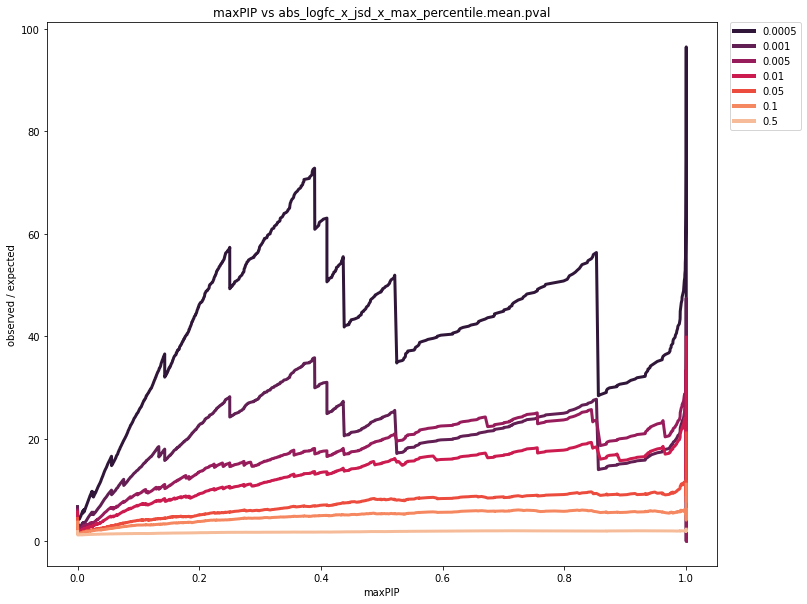

In [22]:
0.0001
n_by_thresh_df = by_thresh_df
by_thresh_df = n_by_thresh_df[~n_by_thresh_df['thresh'].isin([0.0001])]

import matplotlib

import seaborn as sns

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

compare_score='maxPIP'
model_score='abs_logfc_x_jsd_x_max_percentile.mean.pval'

ax = sns.lineplot(data=by_thresh_df, x='score', y='ratio', linewidth=3, ci=None,
                  hue='thresh', palette=sns.color_palette('rocket', 7))
leg = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
for line in leg.get_lines():
    line.set_linewidth(4)
ax.set(title=compare_score + ' vs ' + model_score, xlabel=compare_score, ylabel='observed / expected')

# ax.set(yscale='log')
# ax.set_yticks([1,  3,  5, 7, 10, 20, 40, 60, 80, 100, 120])
# ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
# ax.axhline(y=1, color='grey', linestyle='-', alpha=0.2)
# ax.axhline(y=3, color='grey', linestyle='-', alpha=0.2)
# ax.axhline(y=5, color='grey', linestyle='-', alpha=0.2)
# ax.axhline(y=7, color='grey', linestyle='-', alpha=0.2)
# ax.axhline(y=10, color='grey', linestyle='-', alpha=0.2)
# ax.axhline(y=20, color='grey', linestyle='-', alpha=0.2)
# ax.axhline(y=40, color='grey', linestyle='-', alpha=0.2)
# ax.axhline(y=60, color='grey', linestyle='-', alpha=0.2)
# ax.axhline(y=80, color='grey', linestyle='-', alpha=0.2)
# ax.axhline(y=100, color='grey', linestyle='-', alpha=0.2)
# ax.axhline(y=120, color='grey', linestyle='-', alpha=0.2)

plt.savefig("subfigs_new/"+"k562_blood_traits_atac_poster.pdf", transparent=True, dpi=300)